# List of distributions

In [1]:
import jax; jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
from jaxkuramoto import distribution

import matplotlib.pyplot as plt

xs = jnp.arange(-5, 5, 0.01)

## Normal distribution
- Probability density function

$$
p(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

- parameters
    - $\mu$: mean (`loc`)
    - $\sigma$: standard deviation (`scale`)

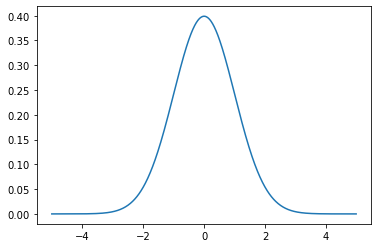

In [2]:
loc = 0.0
scale = 1.0

dist = distribution.Normal(loc=loc, scale=scale)
plt.plot(xs, dist.pdf(xs), label="pdf")

## Cauchy distribution
- Probability density function

$$
p(x)=\frac{\gamma}{\pi}\frac{1}{(x-\mu)^2+\gamma^2}
$$

- parameters
    - $\mu$: location (`loc`)
    - $\gamma$: scale (`gamma`)

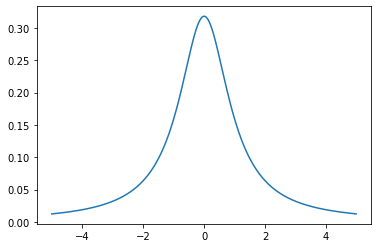

In [3]:
loc = 0.0
gamma = 1.0

dist = distribution.Cauchy(loc=loc, gamma=gamma)
plt.plot(xs, dist.pdf(xs), label="pdf")

## Uniform distribution
- Probability density function for $a\leq x\leq b$

$$
p(x)=\frac{1}{b-a}
$$

- parameters
    - $a$: lower bound (`low`)
    - $b$: upper bound (`high`)

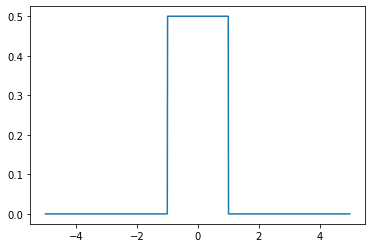

In [4]:
low = -1.0
high = 1.0

dist = distribution.Uniform(low=low, high=high)
plt.plot(xs, dist.pdf(xs), label="pdf")

## Generalized Normal distribution
- Probability density function

$$
p(x)=\frac{n\gamma}{\Gamma(1/(2n))}\exp(-\gamma^{2n}(x-\mu)^{2n})
$$

- parameters
    - $\mu$: location (`loc`)
    - $\gamma$: scale (`gamma`)
    - $n$: shape (`n`)

- Note:
    - $n=1$ is the normal distribution
    - $n\to\infty$ is uniform distribution (range of $x$ is $|x-\mu|<\gamma$)
    $$
    \frac{n\gamma}{\Gamma(1/(2n))}\exp(-\gamma^{2n}(x-\mu)^{2n})\to\frac{1}{2\gamma}
    $$

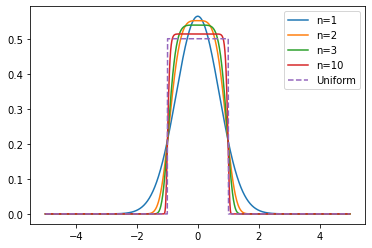

In [5]:
loc = 0.0
gamma = 1.0

for n in [1,2,3,10]:
    dist = distribution.GeneralNormal(loc=loc, gamma=gamma, n=n)
    plt.plot(xs, dist.pdf(xs), label=f"n={n}")
dist_uniform = distribution.Uniform(low=-gamma, high=gamma)
plt.plot(xs, dist_uniform.pdf(xs), label="Uniform", linestyle="--")
plt.legend()

## Generalized Cauchy distribution
- Probability density function

$$
p(x)=\frac{n\sin(\pi/(2n))}{\pi}\frac{\gamma^{2n-1}}{(x-\mu)^{2n}+\gamma^{2n}}
$$

- parameters
    - $\mu$: location (`loc`)
    - $\gamma$: scale (`gamma`)
    - $n$: shape (`n`)

- Note:
    - $n=1$ is Cauchy distribution
    - $n\to\infty$ is uniform distribution (range of $x$ is $|x-\mu|<\gamma$)
    $$
    \frac{n\sin(\pi/(2n))}{\pi}\frac{\gamma^{2n-1}}{x^{2n}+\gamma^{2n}}\to\frac{1}{2\gamma}
    $$

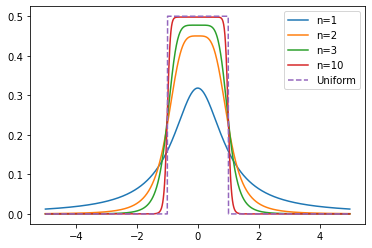

In [6]:
loc = 0.0
gamma = 1.0

for n in [1,2,3,10]:
    dist = distribution.GeneralCauchy(loc=loc, gamma=gamma, n=n)
    plt.plot(xs, dist.pdf(xs), label=f"n={n}")
dist_uniform = distribution.Uniform(low=-gamma, high=gamma)
plt.plot(xs, dist_uniform.pdf(xs), label="Uniform", linestyle="--")
plt.legend()

## Muliplied Cauchy distribution
- Probability density function

$$
p(x)=\frac{\gamma_{1}\gamma_{2}[(\gamma_{1}+\gamma_{2})^{2}+4\Omega^{2}]}{\pi(\gamma_{1}+\gamma_{2})}\frac{1}{[(x-\Omega)^{2}+\gamma_{1}^{2}][(x+\Omega)^{2}+\gamma_{2}^{2}]}
$$

- parameters
    - $\Omega$: location (`Omega`)
    - $\gamma_{1}$: scale (`gamma1`)
    - $\gamma_{2}$: scale (`gamma2`)

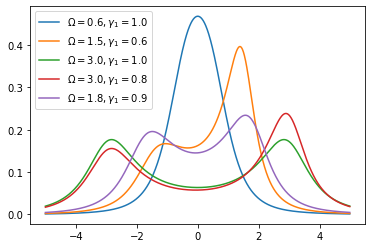

In [7]:
# Omega, gamma1, gamma2
params = [
    (0.6, 1.0, 1.0), (1.5, 0.6, 1.0), (3.0, 1.0, 1.0),
    (3.0, 0.8, 1.0), (1.8, 0.9, 1.0)
]
for Omega, gamma1, gamma2 in params:
    dist = distribution.CauchyMultiply(Omega=Omega, gamma1=gamma1, gamma2=gamma2)
    plt.plot(xs, dist.pdf(xs), label=rf"$\Omega={Omega}, \gamma_{1}={gamma1}$")
plt.legend()

## Finite-differentiable distribution

- Probability density function for $|x-\mu|\leq\gamma$

$$
p(x)=\frac{1}{\gamma B(n+2, 1/2)}\left[1 - \left(\frac{x-\mu}{\gamma}\right)^{2}\right]^{n+1}
$$

- parameters
    - $\mu$: mean (`loc`)
    - $\gamma$: represent the scale of the distribution (`scale`)

- Note:
    - This distribution has the smoothness of $C^{n}$ but not $C^{n+1}$ for finite $n$.
    - $B(x, y)$ is the [beta function](https://en.wikipedia.org/wiki/Beta_function).
    - By scaling $\gamma=\sqrt{n+1}\gamma$, this distribution goes to the noraml distribution with the standard deviation $\gamma/\sqrt{2}$ in the limit of $n\to\infty$.
    $$
    \frac{1}{\sqrt{n+1}\gamma B(n+2, 1/2)}\left[1 - \frac{1}{n+1}\left(\frac{x-\mu}{\gamma}\right)^{2}\right]^{n+1}\to\frac{1}{\gamma\sqrt{\pi}}\exp\left(-\frac{(x-\mu)^{2}}{\gamma^{2}}\right)
    $$

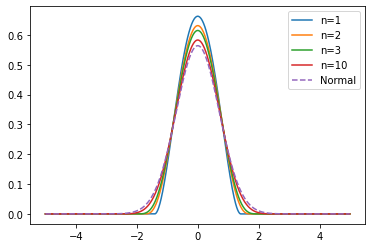

In [8]:
loc = 0.0
gamma = 1.0
for n in [1,2,3,10]:
    scale = gamma * jnp.sqrt(n + 1)
    dist = distribution.FiniteDifferential(loc=loc, scale=scale, n=n)
    plt.plot(xs, dist.pdf(xs), label=f"n={n}")
dist_normal = distribution.Normal(loc=loc, scale=gamma / jnp.sqrt(2))
plt.plot(xs, dist_normal.pdf(xs), label="Normal", linestyle="--")
plt.legend()